# Python - Exercises

##  SV lytic model
### Simulate a viral invasion -

Consider the SV model for lytic infections with susceptible cells (S) and free viruses (V) given by,
\begin{align}
\dot{S} &= bS (1- S/K) - \phi SV - dS\\
\dot{V} &= \beta\phi SV - \phi SV - mV
\end{align}

use the following set of parameter values:

$$ \phi = 6.7 \times 10^{-10} \ \mathrm{mL} \ \mathrm{h}^{-1} $$
 $$  m = 1/24 h^{−1} $$
  $$ d = 1/4 h^{−1}$$
 $$ b = 0.95 h^{−1}$$
$$ K = 7.5\times 10^7 \text{cell mL}^{−1}$$
 $$ \beta = 50$$ virus/cell 

### SV simulation

Starting with the SV model, initiate an ‘inoculation’, adding $S0 = 10^4 $cell/mL of microbe, and
then letting the population reach its equilibrium after approximately 24 h.

Question: What population density does it reach? Is it what you expect? Compare your numerical simulation of S at the end of the simulation with the value of the equilibrium that you found analytically. Numerically, create a function describing the SV model and integrate it using python.

In [1]:
# SV model function
def SV_ode(y,t,pars):
    """
    returns the rate of change of host and virus in the standard SV model
    """
    # initialization
    dydt=np.zeros(2)
    S = y[0]
    V = y[1]
    # Parameters
    phi = pars["phi"]
    m = pars["m"]
    d = pars["d"]
    b = pars["b"]
    K = pars["K"]
    beta = pars["beta"]
    # system of ODEs
    dydt[0] = b*S*(1-S/K) - phi*S*V - d*S
    dydt[1] = beta*phi*S*V - phi*S*V - m*V
    return dydt

Text(0.5, 1.0, 'SV numerical integration')

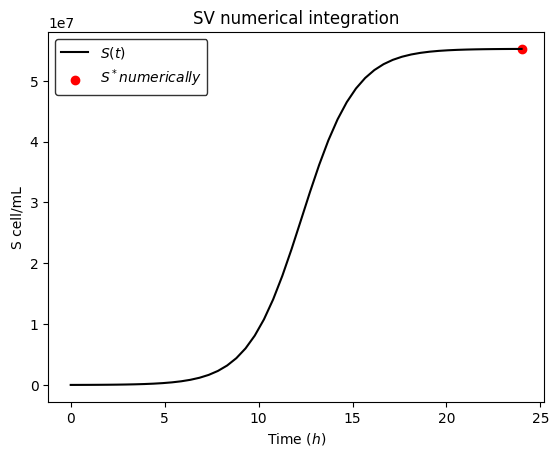

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Numerical time
t0 = 0 # Initial time
tf = 24 # Final time
T = np.linspace(t0,tf) # time steps to report
# Initial population size
y0 = np.zeros(2)
y0[0] = 1E4;
# parameters
pars={}
pars["phi"] = 6.7E-10
pars["m"] = 1/24
pars["d"] = 1/4
pars["b"] = 0.95
pars["K"] = 7.5E7
pars["beta"] = 50

dy = integrate.odeint(SV_ode,y0,T,args=(pars,))
S = dy[:,0]

# Find the equilibrium value numerically:

Seq_num = S[-1]
# plot
plt.plot(T,S,'k', label="$S(t)$")
plt.scatter(T[-1],Seq_num,color='red', label="$S^* numerically$")
plt.legend(edgecolor='k')
plt.xlabel('Time ($h$)')
plt.ylabel('S cell/mL')
plt.title("SV numerical integration")

Analytically, we find that in the absence of virus in the system $$(V0 = 0), \dot{V} = 0$$ and the system remains disease-free. The SV system reduces to the logistic model with cell death, 
$$\dot{S} = bS(1- S/K) - dS$$ Solving $$\dot{S} = 0$$ we find that S approaches the equilibrium point $$S^∗ = K(1-d/b)$$


Seq =  55263157.89473685


Text(0.5, 1.0, 'SV numerical integration')

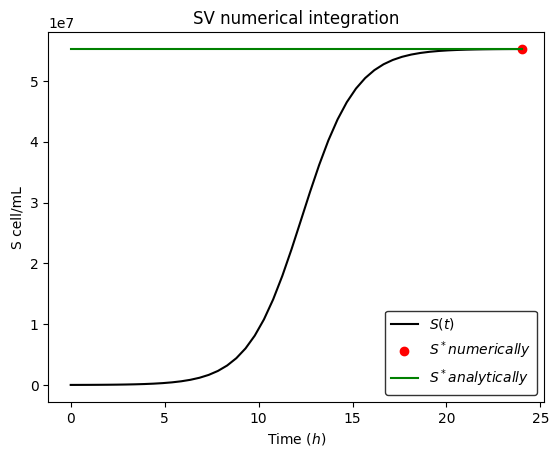

In [5]:
Seq_ana = pars["K"]*(1-pars["d"]/pars["b"])
print("Seq = ", Seq_ana)
# plot and compare
plt.plot(T,S,'k', label="$S(t)$")
plt.scatter(T[-1],Seq_num,color='red', label="$S^* numerically$")
plt.plot(T,np.repeat(Seq_ana,len(T)),color='green', label="$S^* analytically$")
plt.legend(edgecolor='k')
plt.xlabel('Time ($h$)')
plt.ylabel('S cell/mL')
plt.title("SV numerical integration")

### Finding out basic reproduction number

Beginning from the disease-free equilibrium, add V0 = 100 virus/mL and using β = 50 virus/cell for the burst size, estimate the basic reproduction number R0.

**Question:** What is the value of R_0 and what can you tell about the viral invasion? Simulate the dynamical system, do the viruses increase in abundance?


**Answer:** The reproduction number is the number of newly infected induced by one infected in a
fully susceptible population. It is a threshold value, that indicates if the virus is going to invade or
being washed-out. When $$R0 > 1$$ the virus has a positive growth rate and invade the population,
when $$R0 <= 1$$ the virus has negative or null population growth rate and is not able to invade.
We want to find a condition for invasion, you can solve $$\dot{V} > 0 (\text{ at } S∗)$$ (disease free equilibrium) for
a initial inoculation of virus V0:

$$ \dot{V} = \beta\phi S^* V_0 - \phi S^* V_0 -mV_0 $$
$$ iff, \frac{\beta\phi S^*}{\phi S^*+m} >1 $$

The basic reproduction number of the system is $$ R_0 =\frac{\beta\phi S^*}{\phi S^*+m}$$

In [7]:
R0 = pars["beta"]*pars["phi"]*Seq_ana/(pars["phi"]*Seq_ana+pars["m"])
print("R0 =",R0)

R0 = 23.525805372868135


Text(0.5, 1.0, 'SV numerical integration')

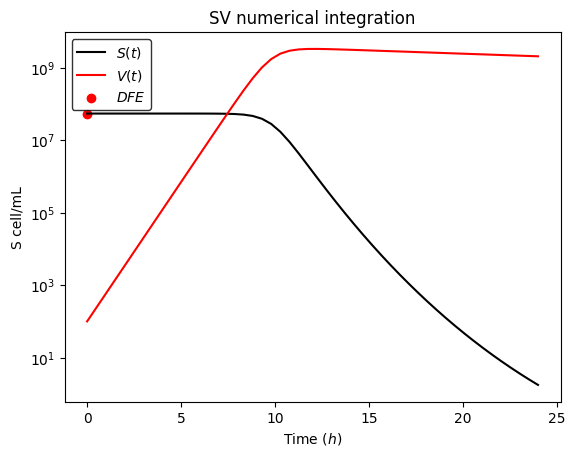

In [8]:
# Initial population size
y0 = np.zeros(2)
y0[0] = Seq_ana;
y0[1] = 100;
dy = integrate.odeint(SV_ode,y0,T,args=(pars,))
S = dy[:,0]
V = dy[:,1]
# plot
plt.semilogy(T,S,'k', label="$S(t)$")
plt.semilogy(T,V,'r', label="$V(t)$")
plt.scatter(0,Seq_num,color='red', label="$DFE$")
plt.legend(edgecolor='k')
plt.xlabel('Time ($h$)')
plt.ylabel('S cell/mL')
plt.title("SV numerical integration")

### Estimating growth rate of virus population 

Estimate the growth rate of the virus population.
**Question:** Does it agree with your theoretical expectations?
**Answer:** Evaluate $$ \dot{V}|_{S= S^∗}$$. 

$$ 1/V dV/dt = \beta\phi S^* - \phi S^* -m  $$.
$$ r = \beta\phi S^* - \phi S^* -m  $$

Replacing $$ S^*$$ by is expression and re-arranging:
$$ r = (\beta-1)\phi K (1-d/b) -m  $$

Numerically estimate the slope of log(V ) over time during the exponential growth phase and compare with the above equation for r with parameter values substituted.

coefficient of determination: 0.9999999087304561
r_num: [1.77215286]
r_ana = :1.7726228070175436


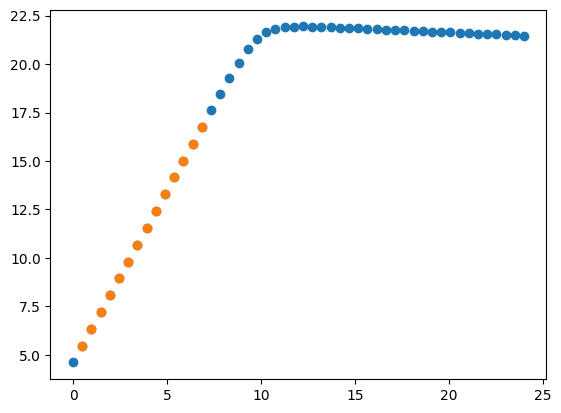

In [10]:
# 1) numerical method
# plot over T and find the exponential phase
plt.scatter(T,np.log(V))

plt.scatter(T[1:15],np.log(V[1:15]))
# linear regression
from sklearn.linear_model import LinearRegression
x_reg = T[1:15].reshape((-1, 1))
y_reg = np.log(V[1:15])
reg_model = LinearRegression().fit(x_reg, y_reg)
r_sq = reg_model.score(x_reg, y_reg)
print(f"coefficient of determination: {r_sq}")
r_num = reg_model.coef_
print(f"r_num: {r_num}")
# 2) analytical method
r_ana = (pars["beta"]-1)*pars["phi"]*pars["K"]*(1-pars["d"]/pars["b"])-pars["m"]
print(f"r_ana = :{r_ana}")

Finally, plot the dynamics in the phase plane and evaluate whether the system converges to a new
coexistence equilibrium - in doing so compare the equilibrium to theory, noting how the bacterial
density changes and to what extent the dynamics exhibit cycles or not.

### Phase space plots

**Question:** Finally, plot the dynamics in the phase plane and evaluate whether the system converges to a new
coexistence equilibrium - in doing so compare the equilibrium to theory, noting how the bacterial
density changes and to what extent the dynamics exhibit cycles or not.

**Answer:** Range over the phi to see how the solution trajectories change in the phase. For sufficient small ϕ, no invasion will occur. For large enough ϕ, invasion occurs, and you
can find closed cycles by running out long enough. For intermediate values of ϕ, invasion occurs
but population now tend towards and an equilibrium point.

The endemic equilibrium is 
$$
S^* = m/(\beta -1)\phi
$$
$$
V^* = \frac{1}{\phi} (d-b-\frac{bm}{(\beta -1)\phi K})
 $$

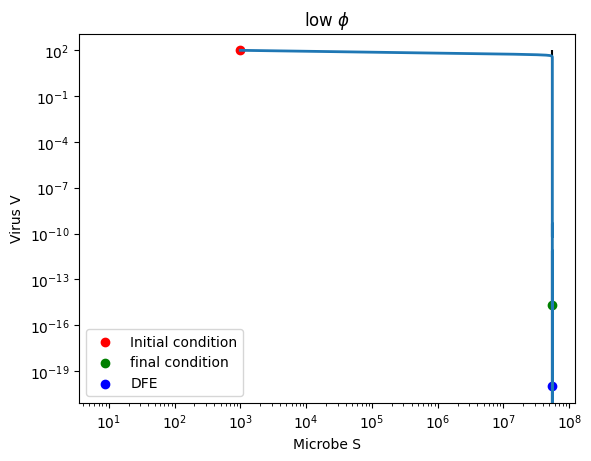

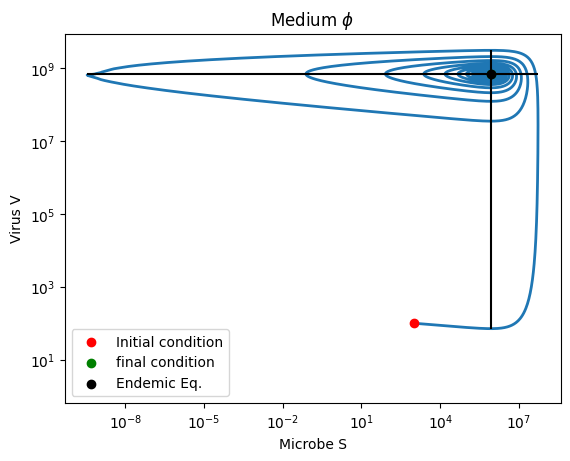

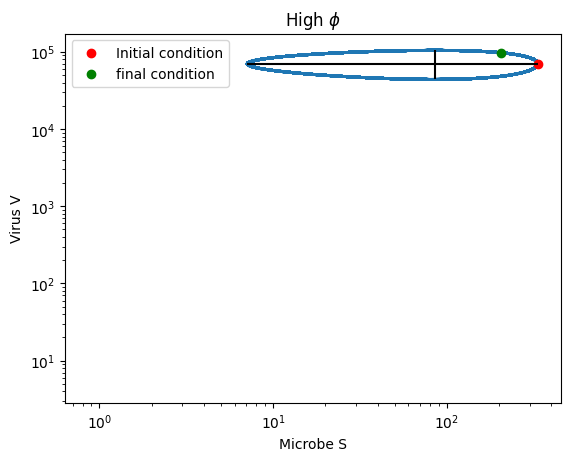

In [11]:
# Integrate the model numerically
# time
t0=0 #Initial Time
dt=0.1
tf=5000 #Final time
T = np.arange(t0,tf,dt)
# Initial conditions
y0 = np.zeros(2)


### Low phi
pars['phi'] = 1E-12;
y0[0] = 1000;
y0[1] = 100;
dy = integrate.odeint(SV_ode,y0, T, args=(pars,))
S = dy[:,0];
V = dy[:,1];
plt.figure(0)
plt.loglog(S,V,linewidth=2)
plt.scatter(y0[0],y0[1],color='red',label='Initial condition')
plt.scatter(S[-1],V[-1],color='green',label='final condition')
plt.scatter(Seq_ana,1E-20,color='blue',label='DFE')
plt.vlines(Seq_ana,ymin=min(V),ymax=max(V),color='k',zorder=1)
plt.xlabel("Microbe S")
plt.ylabel("Virus V")
plt.title("low $\phi$")
plt.legend()
plt.show()


### Medium phi
pars['phi'] = 1E-9;
Seq = pars["m"]/((pars["beta"]-1)*pars["phi"])
Veq = (1/pars["phi"])*(pars["b"]*(1-Seq/pars["K"])-pars["d"])
y0[0] = 1000;
y0[1] = 100;
dy = integrate.odeint(SV_ode,y0, T, args=(pars,))
S = dy[:,0];
V = dy[:,1];
plt.figure(1)
plt.loglog(S,V,linewidth=2,zorder=-1)
plt.scatter(y0[0],y0[1],color='red',label='Initial condition')
plt.scatter(S[-1],V[-1],color='green',label='final condition')
plt.scatter(Seq,Veq,color='k',label='Endemic Eq.')
plt.vlines(Seq,ymin=min(V),ymax=max(V),color='k',zorder=1)
plt.hlines(Veq,xmin=min(S),xmax=max(S),color='k',zorder=1)
plt.xlabel("Microbe S")
plt.ylabel("Virus V")
plt.title("Medium $\phi$")
plt.legend()
plt.show()

### High phi
pars['phi']
### High phi
pars['phi'] = 1E-5;
Seq = pars["m"]/((pars["beta"]-1)*pars["phi"])
Veq = (1/pars["phi"])*(pars["b"]*(1-Seq/pars["K"])-pars["d"])
y0[0] = Seq+250;
y0[1] = Veq+500;
dy = integrate.odeint(SV_ode,y0, T, args=(pars,))
S = dy[:,0];
V = dy[:,1];
plt.figure(2)
plt.loglog(S,V,linewidth=2,zorder=-1)
plt.scatter(y0[0],y0[1],color='red',label='Initial condition')
plt.scatter(S[-1],V[-1],color='green',label='final condition')
plt.vlines(Seq,ymin=min(V),ymax=max(V),color='k',zorder=1)
plt.hlines(Veq,xmin=min(S),xmax=max(S),color='k',zorder=1)
plt.xlabel("Microbe S")
plt.ylabel("Virus V")
plt.title("High $\phi$")
plt.legend(loc='upper left')
plt.show()

## SIV model
Consider the SIV model with susceptible S cells, infected I cells and free virus particles V ,

\begin{align}
\dot{S} &= bS (1- \frac{S+I}{K}) - \phi SV - dS\\
\dot{I} &= \phi SV - \eta I - dI\\
\dot{V} &= \beta\phi SV - \phi SV - mV
\end{align}

Use the following set of parameter values:

$$ \phi = 6.7 \times 10^{-10} \ \mathrm{mL} \ \mathrm{h}^{-1} $$
 $$  m = 1/24 h^{−1} $$
  $$ d = 1/4 h^{−1}$$
 $$ b = 0.95 h^{−1}$$
 $$ \eta = 1 h^{−1}$$
$$ K = 5\times 10^7 \text{cell mL}^{−1}$$



### Basic reproduction number

Beginning from the disease-free equilibrium, add V0 = 100 virus/mL with a burst β = 50 virus/cell
and a lysis rate η = 0.5 hours. Estimate the basic reproduction number R0.

**Question:** Is R0 > 1? Simulate the dynamical system and conclude on the invasion of the virus.

**Answer** For zero initial viral density. 
$$ \dot{S} = 0$$
$$ S^*_{DFE} = K(1-\frac{d}{b})$$

R0 = viral production * probability to infect before virus die * probability to lyse before cells
die.
S0, $$ R_0 = \beta  \frac{mS^*}{mS^*+m} \frac{\eta}{\eta+d}$$

In [13]:
#Estimate the R0
# parameters
pars={}
pars["phi"] = 6.7E-10
pars["m"] = 1/24
pars["d"] = 1/4
pars["b"] = 0.95
pars["K"] = 5E6
pars["beta"] = 50
pars["eta"] = 0.5
# DFE
S_DFE = pars["K"]*(1-pars["d"]/pars["b"])
prod = pars["beta"]
proba_lyse = pars["phi"]*S_DFE/(pars["phi"]*S_DFE+pars["m"])
proba_inf = pars["eta"]/(pars["eta"]+pars["d"])


R0 = prod*proba_lyse*proba_inf
print(R0)


1.8642922447032637


In [14]:
# SIV model function
def SIV_ode(y,t,pars):
    """
    returns the rate of change of host and virus in the standard SIV model
    """
    # initialization
    dydt=np.zeros(3)
    S = y[0]
    I = y[1]
    V = y[2]
    # Parameters
    phi = pars["phi"]
    m = pars["m"]
    d = pars["d"]
    b = pars["b"]
    K = pars["K"]
    beta = pars["beta"]
    eta = pars["eta"]
    # system of ODEs
    dydt[0] = b*S*(1-S/K) - phi*S*V - d*S
    dydt[1] = phi*S*V - eta*I - d*I
    dydt[2] = beta*eta*I - phi*S*V - m*V
    return dydt

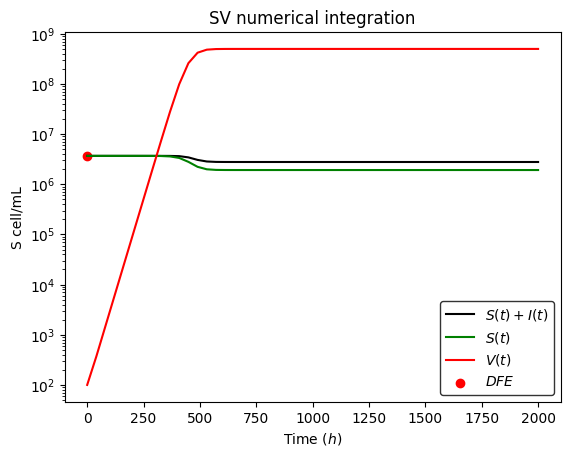

In [15]:
# Numerical time
t0 = 0 # Initial time
tf = 2000 # Final time
T = np.linspace(t0,tf) # time steps to report
# parameters
pars={}
pars["phi"] = 6.7E-10
pars["m"] = 1/24
pars["d"] = 1/4
pars["b"] = 0.95
pars["K"] = 5E6
pars["beta"] = 50
pars["eta"] = 0.5
# Initial population size
y0 = np.zeros(3)
y0[0] = S_DFE;
y0[2] = 100;
# integration
dy = integrate.odeint(SIV_ode,y0,T,args=(pars,))
S = dy[:,0]
I = dy[:,1]
V = dy[:,2]
# plot
plt.semilogy(T,S+I,'k', label="$S(t)+I(t)$")
plt.semilogy(T,S,'g', label="$S(t)$")
plt.semilogy(T,V,'r', label="$V(t)$")
plt.scatter(0,S_DFE,color='red', label="$DFE$")
plt.legend(edgecolor='k')
plt.xlabel('Time ($h$)')
plt.ylabel('S cell/mL')
plt.title("SV numerical integration")
plt.show()

### Modulating the viral burst size

**Question:** Do the viruses always invade? Why or why not? there is a critical point in the
dynamics? Does it agree with your theoretical expectations?

**Answer:** No, when the burst size is too low, then R0 < 1 and the invasion is not possible. Calculate
the critical burst size using the equation of R0 > 1.

Text(0.5, 1.0, 'SV numerical integration')

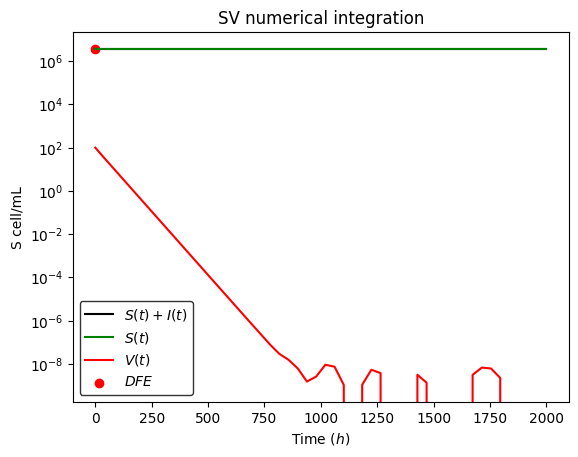

In [18]:
#\beta = 10
# Numerical time
t0 = 0 # Initial time
tf = 2000 # Final time
T = np.linspace(t0,tf) # time steps to report
# parameters
pars["beta"] = 10
# Initial population size
y0 = np.zeros(3)
y0[0] = S_DFE
y0[2] = 100;
# integration
dy = integrate.odeint(SIV_ode,y0,T,args=(pars,))
S = dy[:,0]
I = dy[:,1]
V = dy[:,2]
# plot
plt.semilogy(T,S+I,'k', label="$S(t)+I(t)$")
plt.semilogy(T,S,'g', label="$S(t)$")
plt.semilogy(T,V,'r', label="$V(t)$")
plt.scatter(0,S_DFE,color='red', label="$DFE$")
plt.legend(edgecolor='k')
plt.xlabel('Time ($h$)')
plt.ylabel('S cell/mL')
plt.title("SV numerical integration")

So the invasion criterion, i.e., where the basic reproduction number R0 is greater than 0 is
$$
\beta_{critical} > \frac{(\eta+d)(\phi S^* +m)}{\eta\phi S^*}
$$

26.819829424307034


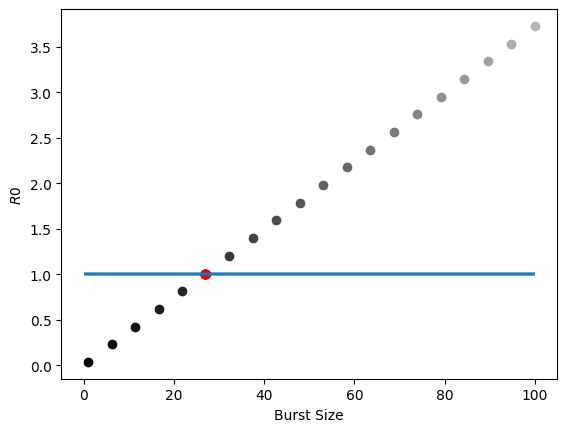

In [20]:
# Estimate the minimum number of burst needed for invasion:
num = (pars["eta"]+pars["d"])*(pars["phi"]*S_DFE+pars["m"])
den = pars["eta"]*pars["phi"]*S_DFE
beta_crit = num/den
print(beta_crit)
Brange = np.linspace(1,100,num=20)
for i in range(len(Brange)):
    pars['beta']=Brange[i] #Set the value of K
    prod = pars["beta"]
    proba_lyse = pars["phi"]*S_DFE/(pars["phi"]*S_DFE+pars["m"])
    proba_inf = pars["eta"]/(pars["eta"]+pars["d"])
    R0 = prod*proba_lyse*proba_inf
    plt.scatter(pars["beta"],R0,color=np.array([0.75,0.75,0.75])*i/len(Brange),label="$R0(\beta)$")
    plt.hlines(1,xmin=0,xmax=100,label="$R0=1$")
    plt.scatter(beta_crit,1,color='red',label="$\beta_{crit}$")
    plt.xlabel("Burst Size")
    plt.ylabel("$R0$")

### Decrease of lysis rate


Returning to burst size of 50, consider what happens if the viral lysis rate η decreases from 1 to 0.1 h.
**Question:** Do the viruses always invade? Why or why not? If there is a critical point in the
dynamics? Does it agree with your theoretical expectations?
**Answer:** Similarly than the burst size, when the lysis rate is too low, then R0 < 1 and the invasion
is not possible.

Text(0.5, 1.0, 'SV numerical integration')

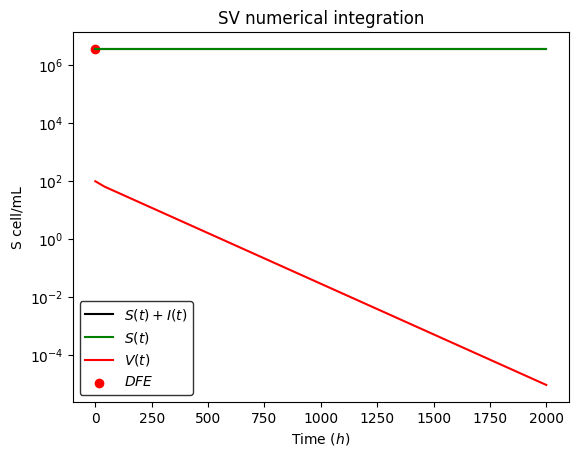

In [22]:
# \eta = 0.1 h^{-1}
# parameters
pars["beta"] = 50
pars["eta"]=0.1
# Initial population size
y0 = np.zeros(3)
y0[0] = S_DFE;
y0[2] = 100;
# integration
dy = integrate.odeint(SIV_ode,y0,T,args=(pars,))
S = dy[:,0]
I = dy[:,1]
V = dy[:,2]
# plot
plt.semilogy(T,S+I,'k', label="$S(t)+I(t)$")
plt.semilogy(T,S,'g', label="$S(t)$")
plt.semilogy(T,V,'r', label="$V(t)$")
plt.scatter(0,S_DFE,color='red', label="$DFE$")
plt.legend(edgecolor='k')
plt.xlabel('Time ($h$)')
plt.ylabel('S cell/mL')
plt.title("SV numerical integration")

Estimate the threshold value of η by considering, basic reproduction number greater than 1 as,
$$
\eta_{crit} = \frac{d(\phi S^* +m)}{\beta\phi S^* -\phi S^* -m}
$$

In [26]:
num = pars["d"]*(pars["phi"]*S_DFE + pars["m"])
den = pars["beta"]*pars["phi"]*S_DFE - pars["phi"]*S_DFE - pars["m"]
eta_crit = num/den
print(eta_crit)

0.011129072370057199


### Phase space dynamics
Finally, plot the dynamics in the S-V phase plane and evaluate whether the system converges to
a new coexistence equilibrium - in doing so, compare the equilibrium to theory, noting how the
bacterial density changes, and to what extent the dynamics exhibit cycles or not.

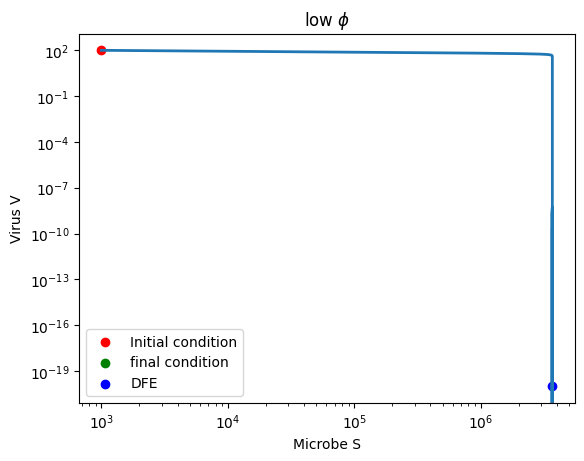

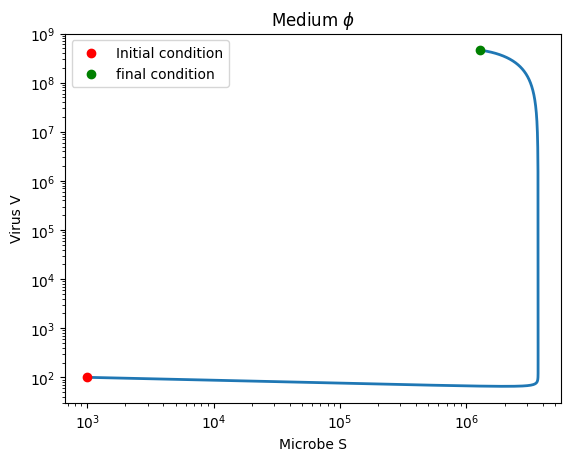

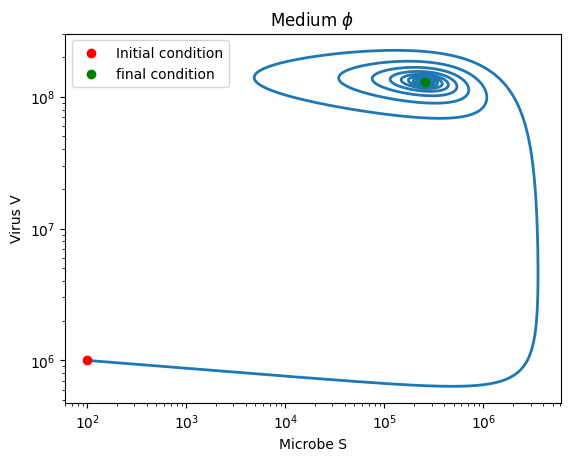

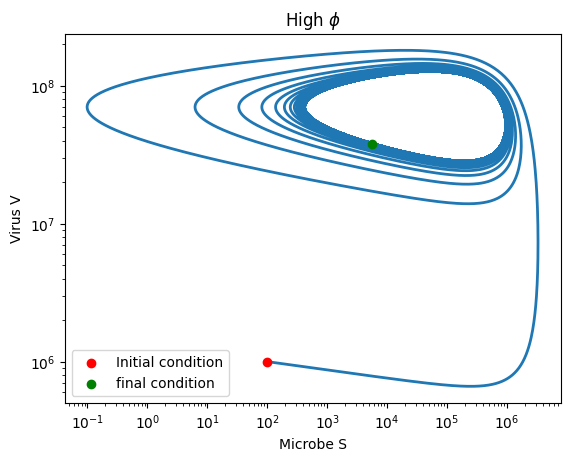

In [25]:
# Integrate the model numerically
# parameters
pars={}
pars["phi"] = 6.7E-10

pars["m"] = 1/24
pars["d"] = 1/4
pars["b"] = 0.95
pars["K"] = 5E6
pars["beta"] = 50
pars["eta"] = 0.5
# time
t0=0 #Initial Time
dt=0.1
tf=5000 #Final time
T = np.arange(t0,tf,dt)
# Initial conditions
y0 = np.zeros(3)
### Low phi
pars['phi'] = 1E-12;
y0[0] = 1000;
y0[1] = 0
y0[2] = 100;
dy = integrate.odeint(SIV_ode,y0, T, args=(pars,))
S = dy[:,0];
I = dy[:,1];
V = dy[:,2];
plt.figure(0)
plt.loglog(S,V,linewidth=2)
plt.scatter(y0[0],y0[2],color='red',label='Initial condition')
plt.scatter(S[-1],V[-1],color='green',label='final condition')
plt.scatter(S_DFE,1E-20,color='blue',label='DFE')
plt.xlabel("Microbe S")
plt.ylabel("Virus V")
plt.title("low $\phi$")
plt.legend()
plt.show()


### Medium phi
pars['phi'] = 1E-9;
y0[0] = 1000;
y0[1] = 0;
y0[2] = 100;
dy = integrate.odeint(SIV_ode,y0, T, args=(pars,))
S = dy[:,0];
I = dy[:,1];
V = dy[:,2];
plt.figure(1)
plt.loglog(S,V,linewidth=2,zorder=-1)
plt.scatter(y0[0],y0[2],color='red',label='Initial condition')
plt.scatter(S[-1],V[-1],color='green',label='final condition')
plt.xlabel("Microbe S")
plt.ylabel("Virus V")
plt.title("Medium $\phi$")
plt.legend()
plt.show()

### Medium phi 2
pars['phi'] = 5E-9;#1E-8;
y0[0] = 100;
y0[1] = 0;
y0[2] = 1E6;
dy = integrate.odeint(SIV_ode,y0, T, args=(pars,))
S = dy[:,0];
I = dy[:,1];
V = dy[:,2];
plt.figure(2)
plt.loglog(S,V,linewidth=2,zorder=-1)
plt.scatter(y0[0],y0[2],color='red',label='Initial condition')
plt.scatter(S[-1],V[-1],color='green',label='final condition',zorder=1)
plt.xlabel("Microbe S")
plt.ylabel("Virus V")
plt.title("Medium $\phi$")
plt.legend()
plt.show()


### Medium phi 2
pars['phi'] = 1E-8;
y0[0] = 100;
y0[1] = 0;
y0[2] = 1E6;
dy = integrate.odeint(SIV_ode,y0, T, args=(pars,))
S = dy[:,0];
I = dy[:,1];
V = dy[:,2];
plt.figure(3)
plt.loglog(S,V,linewidth=2,zorder=-1)
plt.scatter(y0[0],y0[2],color='red',label='Initial condition')
plt.scatter(S[-1],V[-1],color='green',label='final condition',zorder=1)
plt.xlabel("Microbe S")
plt.ylabel("Virus V")
plt.title("High $\phi$")
plt.legend()
plt.show()

